In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.cuda as cuda

In [63]:
torch.__version__

'2.3.1+cu118'

In [2]:
device = 'cuda' if cuda.is_available() else 'cpu'

/home/sanven0212/PycharmProjects/Pytorch_First_Project/.venv/lib/python3.10/site-packages/torch/cuda/__init__.py:118: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [3]:
import torchvision

In [4]:
print(torchvision.__version__)

0.18.1+cu118


In [5]:
device

'cpu'

In [6]:
#Importing necessary torchvision libraries
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

**Getting an image dataset (`FashionMNIST`) and checking the dimensions**

In [7]:
train_data = datasets.FashionMNIST(root = 'data', # Location for storing the data
                                   train = True, # If set to True returns train set else returns test set
                                   transform = ToTensor(), # The samples are converted to tensors
                                   download = True, #Whether to download or not 
                                   target_transform = None) # How to transform the target i.e. the labels

test_data = datasets.FashionMNIST(root = 'data', train = False, transform = ToTensor(), download = True, target_transform = None)

In [8]:
#Checking the dimensions
len(train_data), len(test_data)

(60000, 10000)

In [9]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [10]:
train_data[1]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
           0.0000, 0.0000, 0.1608, 0.7373, 0.4039, 0.2118, 0.1882, 0.1686,
           0.3412, 0.6588, 0.5216, 0.0627, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.1922,
           0.5333, 0.8588, 0.8471, 0.8941, 0.9255, 1.0000, 1.0000, 1.0000,
           1.0000, 0.8510, 0.8431, 0.9961, 0.9059, 0.6275, 0.1765, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.6902, 0.8706,
           0.8784, 0.8314, 0.7961, 0.7765, 0.7686, 0.7843, 0.8431, 0.8000,
           0.7922, 0.7882, 0.7882, 0.7882, 0.8196, 0.8549, 0.8784, 0.6431,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7373, 0.8588, 0.7843,
           0.7765, 0.7922, 0.7765, 0.7804, 0.7804, 0.7882, 0.7686, 0.7765,
           0.7765, 0.7843, 0.7843, 0.7843, 

In [11]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [12]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

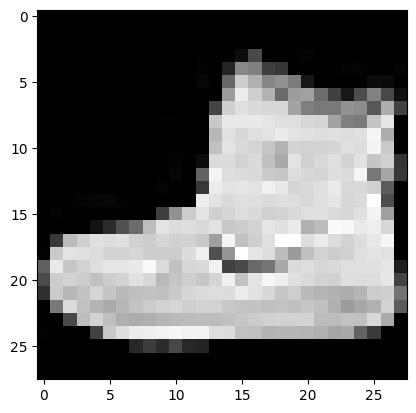

In [13]:
plt.imshow(train_data[0][0].squeeze(), cmap='gray')

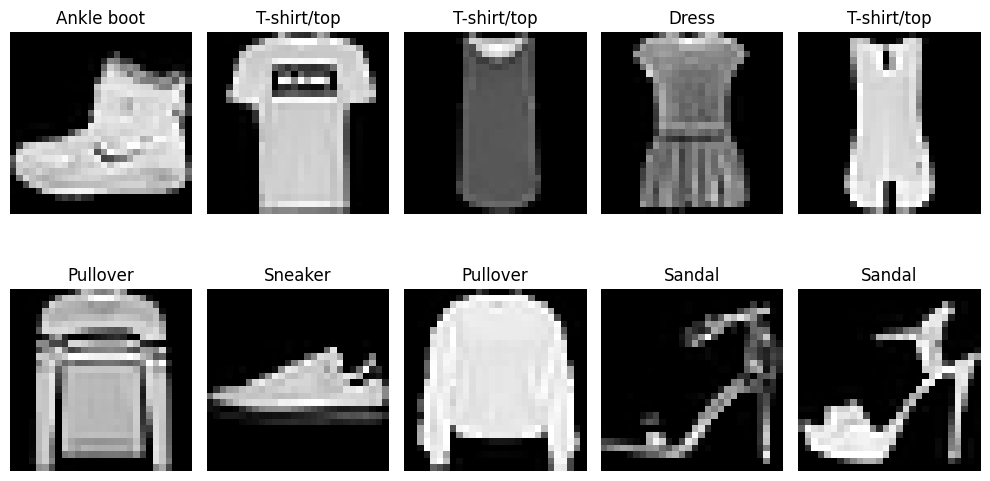

In [14]:
plt.figure(figsize = (10, 7))
for i in range(10):
    plt.subplot(2 , 5, i + 1)
    plt.imshow(train_data[i][0].squeeze(), cmap = 'gray')
    plt.title(train_data.classes[train_data[i][1]])
    plt.axis(False)
    plt.tight_layout()

**Preparing a `DataLoader` from the train_data and test_data so that we can convert it to Python iterable and convert them to Mini batches**

In [15]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [16]:
from torch.utils.data import DataLoader

In [17]:
#Setting up the hyperparameters
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, shuffle = True)
test_dataloader = DataLoader(dataset = test_data, batch_size = BATCH_SIZE, shuffle = True)

In [18]:
train_dataloader

In [19]:
print(f'Train Data Loader: {train_dataloader}')

Train Data Loader: <torch.utils.data.dataloader.DataLoader object at 0x7b13869e8520>


In [20]:
len(train_dataloader) # This gives the total number of batches

1875

In [21]:
print(f'No of train dataloader batches {len(train_dataloader)}')

No of train dataloader batches 1875


In [22]:
#Get a random sample
torch.manual_seed(42)
import torch.random
#Getting the batches
train_features_batch, train_labels_batch = next(iter(train_dataloader))

In [23]:
train_features_batch.shape

torch.Size([32, 1, 28, 28])

**Note: `next(iter(dataset))` will return the features and the labels batches**

In [24]:
train_labels_batch.shape

torch.Size([32])

**Note: Each batch has 32 images with 1 color channel (grayscale) with 28 x 28 dim; and for each batch 32 labels will be there. This explains the above outputs**

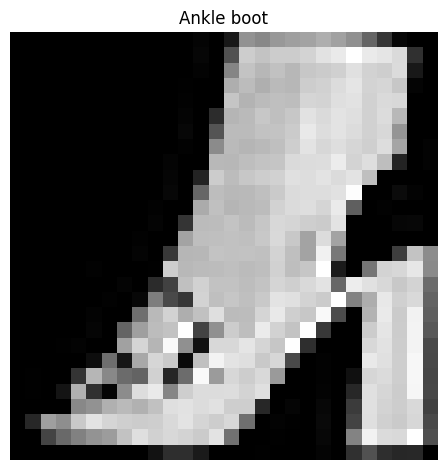

In [25]:
#Plotting a random image
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.title(train_data.classes[label])
plt.imshow(img.squeeze(), cmap = 'gray')
plt.axis(False)
plt.tight_layout()

**Model-0: Baseline Model with 2 Linear layers**

In [26]:
#Flatten layer
flatten_model = nn.Flatten()
#Getting a single sample
x = train_features_batch[0]
#Flatten Output
output = flatten_model(x)
print(f'Shape before flattening: {x.shape}\nShape after flattening: {output.shape}')

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


**Note: The flatten layer converted the image from (color_channel, width, height) to (color_channel, width x height)**

In [27]:
class FashionMNISTModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(nn.Flatten(),
                                         nn.Linear(in_features = input_shape, out_features = hidden_units),
                                         nn.Linear(in_features = hidden_units, out_features = output_shape)
                                         )
    def forward(self, x):
        return self.layer_stack(x)

In [28]:
model_0 = FashionMNISTModel(input_shape = 784, hidden_units = 10, output_shape = len(train_data.classes)).to('cpu')

In [29]:
model_0

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [30]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0296, -0.0084,  0.0328,  ...,  0.0093,  0.0135, -0.0188],
                      [-0.0354,  0.0187,  0.0085,  ..., -0.0001,  0.0115, -0.0008],
                      [ 0.0017,  0.0045,  0.0133,  ..., -0.0188,  0.0059,  0.0100],
                      ...,
                      [ 0.0273, -0.0344,  0.0127,  ...,  0.0283, -0.0011, -0.0230],
                      [ 0.0257,  0.0291,  0.0243,  ..., -0.0087,  0.0001,  0.0176],
                      [-0.0147,  0.0053, -0.0194,  ..., -0.0221,  0.0205, -0.0093]])),
             ('layer_stack.1.bias',
              tensor([ 0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,  0.0018,
                       0.0163,  0.0069])),
             ('layer_stack.2.weight',
              tensor([[-0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,  0.2019,
                        0.2847, -0.1495],
                      [ 0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.3130, -0.

In [31]:
dummy_x = torch.rand([1, 1, 28, 28]).to('cpu')
model_0(dummy_x)

tensor([[ 0.4283,  0.1136, -0.3903, -0.0246, -0.0698,  0.2508,  0.4007, -0.4172,
         -0.0264, -0.2463]], grad_fn=<AddmmBackward0>)

In [32]:
#Loss function and optimizer for model_0
loss_fn_0 = nn.CrossEntropyLoss()
optimizer_fn_0 = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

**Function for timing the experiments to track how fast the model runs**

In [33]:
from timeit import default_timer as timer
def print_run_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f'Total Time on {device}: {total_time:.3f}s')
    return total_time

In [34]:
start_time = timer()
#Code....
end_time = timer()
print_run_time(start_time, end_time, device)

Total Time on cpu: 0.000s


1.2761000107275322e-05

**`optimizer` updates the model parameters once for every batch rather than once per epoch**

**Steps to be followed**

1. Loop through epochs
2. Loop through training batches, perform training steps, compute training loss
3. Loop through test batches, perform testing steps, compute test loss
4. Print the verbose
5. Time the modelling experiment

**Note: tqdm can be used for checking the progress of the model training**

In [35]:
from helper_functions import accuracy_fn

In [36]:
from tqdm.auto import tqdm
import logging
logging.basicConfig(level=logging.INFO)
import sys
torch.manual_seed(42)
train_start_time = timer()
epochs = 3

for i in range(epochs):
    print(f'Epoch: {i + 1}\n-------')
    sys.stdout.flush()
    train_loss = 0
    #Looping through each batch (batch, X: image, y: label)
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        #Forward pass
        y_pred = model_0(X)
        #Calculate Loss (per batch)
        loss = loss_fn_0(y_pred, y)
        #We're accumulating the loss for each batch and summing them up to get total training loss for an epoch
        train_loss += loss
        #Resetting the optimizer
        optimizer_fn_0.zero_grad()
        #Backpropagation
        loss.backward()
        #Stepping the optimizer
        optimizer_fn_0.step()
        if (batch % 400) == 0:
            print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.') # Len of the dataset in the dataloader
            sys.stdout.flush()
    #Diving total train loss by length of train loader (We need average loss for all the batches in an epoch)
        train_loss /= len(train_dataloader)
    #Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            #Forward Pass
            test_pred = model_0(X)
            
            # Compute Loss
            test_loss += loss_fn_0(test_pred, y)
            #Compute Accuracy
            test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim = 1))
        #Compute test loss average for each batch
        test_loss /= len(test_dataloader)
        #Compute test_acc average for each batch
        test_acc /= len(test_dataloader)
    print(f'Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')
    sys.stdout.flush()
#Compute train time
train_time_end_on_gpu = timer()
total_train_time_model_0 = print_run_time(train_start_time, train_time_end_on_gpu, device = str(next(model_0.parameters()).device))

Epoch: 1
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.0003 | Test Loss: 0.5170, Test Acc: 81.8291
Epoch: 2
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.0002 | Test Loss: 0.5343, Test Acc: 81.3998
Epoch: 3
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.0004 | Test Loss: 0.5168, Test Acc: 82.8874
Total Time on cpu: 15.788s


**Writing evaluation function**

In [37]:
def eval_func(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        #Make preds 
        for X, y in tqdm(data_loader):
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y, y_pred.argmax(dim = 1))
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {'model_name': model.__class__.__name__, 'model_loss': loss.item(), 'model_acc': acc}

In [38]:
model_0_results = eval_func(model_0, test_dataloader, loss_fn_0, accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [39]:
model_0_results

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.5163158178329468,
 'model_acc': 82.90734824281151}

**Setting up device agnostic code**

In [40]:
device

'cpu'

**Model-1 Better model with non-linearity**

In [41]:
class NonLinearModel(nn.Module):
    def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
        super().__init__()
        self.fc_layers = nn.Sequential(nn.Flatten(),
                                       nn.Linear(in_features = input_shape, out_features = hidden_units),
                                       nn.ReLU(),
                                       nn.Linear(in_features = hidden_units, out_features = output_shape))
    def forward(self, x: torch.Tensor):
        return self.fc_layers(x)

In [42]:
torch.manual_seed(42)
model_1 = NonLinearModel(784, len(train_data.classes), 10).to(device)

In [43]:
len(train_data.classes)

10

In [44]:
#Loss_fn and Optimizer for model-1
loss_fn_1 = nn.CrossEntropyLoss()
opt_fn_1 = torch.optim.Adam(params = model_1.parameters(), lr = 0.001)

**Turning the train and test loops into functions**

In [45]:
def train_loop(model: torch.nn.Module, 
               train_data: torch.utils.data.DataLoader, 
               opt: torch.optim.Optimizer, 
               loss: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.train()
    for batch, (X, y) in enumerate(train_data):
        X = X.to(device)
        y = y.to(device)
        #Forward Pass
        y_pred = model(X)
        #Loss
        loss = loss_fn_1(y_pred, y)
        train_loss += loss # Train loss accumulation
        train_acc += accuracy_fn(y, y_pred.argmax(dim = 1)) # Train Acc accumulation
        #Resetting optimizer
        opt.zero_grad()
        #Back propagation
        loss.backward()
        #Stepping the optimizer
        opt.step()
            
    train_loss /= len(train_data) # Avg train loss for one epoch
    train_acc /= len(train_data) # Avg train acc for one epoch
    print(f'Train Loss: {train_loss:.3f} | Train Acc: {train_acc:.3f}')

In [46]:
def test_loop(model: torch.nn.Module,
              test_data: torch.utils.data.DataLoader,
              loss: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device
              ):
    test_acc, test_loss = 0, 0    
    #Eval mode
    model.eval()
    #Inference mode
    with torch.inference_mode():
        for X, y in test_data:
            X, y = X.to(device), y.to(device)
            #Forward Pass
            test_pred = model(X)
            loss = loss_fn_1(test_pred, y)
            test_loss += loss #Loss accumulation
            acc = accuracy_fn(y, test_pred.argmax(dim = 1))
            test_acc += acc
        test_acc /= len(test_data)
        test_loss /= len(test_data)
    print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc:.3f}')

**Training the model**

In [47]:
torch.manual_seed(42)
for epoch in range(3):
    print(f'Epoch {epoch + 1}\n---------')
    train_loop(model_1, train_dataloader, opt_fn_1, loss_fn_1, accuracy_fn, device)
    test_loop(model_1, test_dataloader, loss_fn_1, accuracy_fn, device)

Epoch 1
---------
Train Loss: 0.680 | Train Acc: 77.490
Test Loss: 0.511 | Test Acc: 82.059
Epoch 2
---------
Train Loss: 0.463 | Train Acc: 83.752
Test Loss: 0.509 | Test Acc: 81.440
Epoch 3
---------
Train Loss: 0.433 | Train Acc: 84.860
Test Loss: 0.458 | Test Acc: 84.026


In [48]:
#Creating a new eval function
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn, device: torch.device = device):
    test_acc, test_loss = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y, test_pred.argmax(dim = 1))
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
    return {'model_name': model.__class__.__name__, 'Test Loss': test_loss, 'Test Acc': test_acc}

In [49]:
model_1_results = eval_model(model_1, test_dataloader, loss_fn_1, accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [50]:
model_1_results

{'model_name': 'NonLinearModel',
 'Test Loss': tensor(0.4569),
 'Test Acc': 84.05551118210863}

**Model-2 `CNN` model with PyTorch**

In [51]:
class CNNClassifier(nn.Module):
    def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(nn.Conv2d(in_channels = input_shape, out_channels = hidden_units, kernel_size = (3, 3),                                            stride = (1, 1), padding = (1, 1)),
                                          nn.ReLU(),
                                          nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = (3, 3), stride = (1, 1)),
                                          nn.ReLU(),
                                          nn.MaxPool2d(kernel_size = (2, 2)))
        self.conv_block_2 = nn.Sequential(nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = (3, 3),                                 stride = (1, 1), padding = 1),
                                          nn.ReLU(),
                                          nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = (3, 3), stride = (1, 1), padding = 1),
                                          nn.ReLU(),
                                          nn.MaxPool2d(kernel_size = (2, 2)))
        self.classifier = nn.Sequential(nn.Flatten(),
                                        nn.Linear(in_features = hidden_units * 6 * 6, out_features = output_shape))
    def forward(self, x):
        x = self.conv_block_1(x)
        print(x.shape)
        x = self.conv_block_2(x)
        print(x.shape)
        x = self.classifier(x)
        return x

In [52]:
#Instantiating the model
model_2 = CNNClassifier(input_shape = 1, # no of color channels 
                         output_shape = len(train_data.classes),
                        hidden_units = 10).to(device)

In [53]:
model_2

CNNClassifier(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=360, out_features=10, bias=True)
  )
)

In [54]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060],
                        [ 0.0520,  0.2693,  0.0364]]],
              
              
                      [[[-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927],
                        [-0.1457,  0.1924,  0.0596]]],
              
              
                      [[[ 0.1693, -0.2032, -0.3300],
                        [-0.1288, -0.2557,  0.2735],
                        [ 0.0960,  0.1381,  0.1054]]],
              
              
                      [[[-0.0058,  0.2609, -0.2368],
                        [ 0.0210, -0.2275,  0.1028],
                        [-0.1148,  0.1021, -0.0694]]],
              
              
                      [[[ 0.2765, -0.1976, -0.1988],
                        [-0.1988,  0.2998,  0.1111],
                        [ 0.3208, -0.2751, -0.3306]]],
              
              
      

**Checking the functioning of MaxPool2d layer**

In [55]:
test_data[0][0].shape

torch.Size([1, 28, 28])

In [56]:
tensor_1 = torch.rand((1, 28, 28))

In [57]:
tensor_1

tensor([[[9.5606e-01, 9.3250e-01, 2.0580e-01, 8.4396e-01, 7.2488e-01,
          4.0952e-01, 7.7292e-01, 4.7915e-01, 5.6088e-01, 1.7237e-01,
          4.3843e-01, 9.8946e-01, 8.0975e-01, 9.5915e-02, 4.7168e-01,
          8.1849e-01, 2.8603e-01, 4.3737e-01, 7.4940e-01, 9.2023e-01,
          9.5364e-01, 1.3879e-01, 2.8865e-02, 8.5335e-01, 4.6127e-01,
          9.5142e-01, 8.5490e-01, 3.0480e-01],
         [6.4324e-01, 6.6822e-01, 3.2104e-01, 9.4923e-01, 5.4103e-01,
          3.3658e-01, 4.3300e-02, 9.0016e-01, 4.1999e-03, 8.8057e-01,
          3.2488e-01, 4.0846e-01, 5.6754e-01, 9.9151e-01, 1.7085e-01,
          1.4490e-01, 8.0054e-01, 2.5716e-01, 3.1600e-01, 7.8905e-01,
          2.9274e-01, 7.9782e-01, 3.0499e-01, 8.8460e-01, 9.9810e-01,
          5.6916e-01, 3.3354e-01, 7.8126e-01],
         [6.3975e-01, 5.0217e-01, 9.4608e-01, 4.7108e-01, 6.7575e-01,
          3.5109e-01, 4.0929e-01, 4.7848e-01, 5.3364e-01, 7.1866e-01,
          8.7717e-01, 8.0652e-01, 2.8970e-01, 9.4817e-01, 8.3773e-

In [58]:
maxpool_layer = nn.MaxPool2d(kernel_size = (2, 2))
print(f'Original Tensor shape: {tensor_1.shape} | Maxpooled shape: {maxpool_layer(tensor_1).shape}')

Original Tensor shape: torch.Size([1, 28, 28]) | Maxpooled shape: torch.Size([1, 14, 14])


In [59]:
model_2(tensor_1.unsqueeze(dim = 1).to(device))

torch.Size([1, 10, 13, 13])
torch.Size([1, 10, 6, 6])


tensor([[ 0.0619, -0.0479,  0.0136,  0.0230,  0.0100,  0.0653,  0.0204,  0.0008,
         -0.0495, -0.0058]], grad_fn=<AddmmBackward0>)

**Note: a dummy tensor can be passed through all the layers of a PyTorch model ind order to determine the correct in_features value for the fully connected dense layers**

**Setting up `Loss` function and `optimizer` for model-2**

In [60]:
opt_fn_2 = torch.optim.SGD(params = model_2.parameters(), lr = 0.1)
loss_fn_2 = nn.CrossEntropyLoss()

In [61]:
epochs = 10
torch.manual_seed(42)
for i in range(epochs):
    train_loop(model_2, train_dataloader, opt_fn_2, loss_fn_2, accuracy_fn, device)
    test_loop(model_2, test_dataloader, loss_fn_2, accuracy_fn, device)

torch.Size([32, 10, 13, 13])
torch.Size([32, 10, 6, 6])
torch.Size([32, 10, 13, 13])
torch.Size([32, 10, 6, 6])
torch.Size([32, 10, 13, 13])
torch.Size([32, 10, 6, 6])
torch.Size([32, 10, 13, 13])
torch.Size([32, 10, 6, 6])
torch.Size([32, 10, 13, 13])
torch.Size([32, 10, 6, 6])
torch.Size([32, 10, 13, 13])
torch.Size([32, 10, 6, 6])
torch.Size([32, 10, 13, 13])
torch.Size([32, 10, 6, 6])
torch.Size([32, 10, 13, 13])
torch.Size([32, 10, 6, 6])
torch.Size([32, 10, 13, 13])
torch.Size([32, 10, 6, 6])
torch.Size([32, 10, 13, 13])
torch.Size([32, 10, 6, 6])
torch.Size([32, 10, 13, 13])
torch.Size([32, 10, 6, 6])
torch.Size([32, 10, 13, 13])
torch.Size([32, 10, 6, 6])
torch.Size([32, 10, 13, 13])
torch.Size([32, 10, 6, 6])
torch.Size([32, 10, 13, 13])
torch.Size([32, 10, 6, 6])
torch.Size([32, 10, 13, 13])
torch.Size([32, 10, 6, 6])
torch.Size([32, 10, 13, 13])
torch.Size([32, 10, 6, 6])
torch.Size([32, 10, 13, 13])
torch.Size([32, 10, 6, 6])
torch.Size([32, 10, 13, 13])
torch.Size([32, 10,

KeyboardInterrupt: 

In [ ]:
model_2_results = eval_model(model_2, test_dataloader, loss_fn_2, accuracy_fn, device)

In [ ]:
model_2_results

In [ ]:
result_dataframe = pd.DataFrame({'Linear_model': model_0_results, 'Non_Linear_Model': model_1_results, 'CNN': model_2_results})

In [ ]:
result_dataframe

In [ ]:
def better_eval(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss: torch.nn.Module, accuracy_fn, device):
    test_acc, test_loss = 0, 0
    t_pred = []
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            test_logits = model(X).squeeze()
            test_pred_probs = torch.softmax(test_logits, dim = 0)
            test_preds = test_pred_probs.argmax(dim = 1)
            t_pred.append(test_preds)
            test_acc += accuracy_fn(y, test_preds)
            test_loss += loss_fn_2(test_logits, y)
        test_acc /= len(data_loader)
        test_loss /= len(data_loader)
        t_pred = torch.cat(t_pred)
    return {'model_name': model.__class__.__name__, 'Test Loss': test_loss, 'Test Acc': test_acc, 'Test_preds': test_preds, 'Tpreds': t_pred}

**Note: Just like accuracy and loss, the preds have to be collected for all the batches. Therefore, the values have to be appended to a list rather than assigning them to a variable which will overwrite the previous values**

In [ ]:
better_results_2 = better_eval(model_2, test_dataloader, loss_fn_2, accuracy_fn, device)

In [ ]:
better_results_2

In [ ]:
better_results_2['Test_preds']

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
#Creating a confusion matrix instance & comparing predictions
ConfMat = ConfusionMatrix(num_classes = len(test_data.classes), task = 'multiclass')
confmat_tensor = ConfMat(preds = better_results_2['Tpreds'].to('cpu'), target = test_data.targets.to('cpu'))

In [ ]:
len(test_dataloader)

In [ ]:
len(better_results_2['Test_preds'])

In [ ]:
confmat_tensor

In [ ]:
#Plotting the conf matrix
fig, ax = plot_confusion_matrix(conf_mat = confmat_tensor.numpy(), class_names = test_data.classes, figsize = (10, 7))

**Note: `torch.isclose()` can be used for comparing if 2 tensors are close to each other and the function accepts 2 tensors and ato1 argument that specifies how much precision is required for checking the closeness of the tensor values**